In [1]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.tree import DecisionTreeRegressor

In [2]:
data = pd.read_csv(load_boston()['filename'], skiprows=1)

Из предыдущего задания известно, что пропусков в данном датасете нет, поэтому можно сразу перейти к построению регресии при использовании дерева решений. Для сравнения с моделью линейной регрессии из предыдущего задания сначала оставим все признаки.

In [8]:
#признаки
X = data.drop('MEDV', axis = 1)
#целевая переменная
y = data['MEDV']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 11)

В начале оставляем все параметры стандартные.

In [91]:
DT_regress = DecisionTreeRegressor(random_state = 42)

In [92]:
DT_regress.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [93]:
y_pred_train = DT_regress.predict(X_train) 
y_pred_test = DT_regress.predict(X_test)

Визуализируем разницу

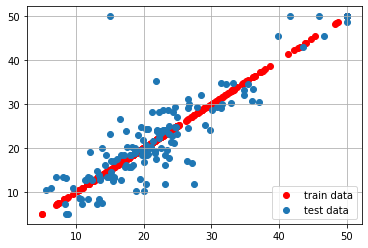

In [94]:
plt.scatter(y_train, y_pred_train, color = 'r', label = 'train data')
plt.scatter(y_test, y_pred_test, label = 'test data')
plt.grid()
plt.legend()
plt.show()

Посчитаем score

In [95]:
DT_regress.score(X_test, y_test)

0.7249204309772186

Результат на уровне линейной регрессии (0.711226005748496)

Немного оптимизируем алгоритм

In [112]:
DT_regress = DecisionTreeRegressor(max_depth = 2, random_state = 42)

In [113]:
DT_regress.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [114]:
y_pred_train = DT_regress.predict(X_train) 
y_pred_test = DT_regress.predict(X_test)

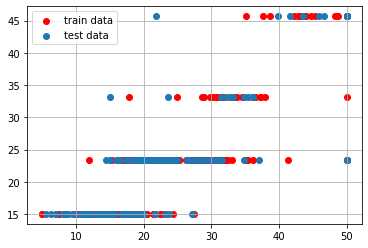

In [115]:
plt.scatter(y_train, y_pred_train, color = 'r', label = 'train data')
plt.scatter(y_test, y_pred_test, label = 'test data')
plt.grid()
plt.legend()
plt.show()

In [116]:
DT_regress.score(X_test, y_test)

0.6374139355159734

При установлении параметра max_depth = 2 точность модели упала до 0.63. Оптимизируем еще.

In [174]:
DT_regress = DecisionTreeRegressor(max_depth = 8, random_state = 42)

In [175]:
DT_regress.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [176]:
y_pred_train = DT_regress.predict(X_train) 
y_pred_test = DT_regress.predict(X_test)

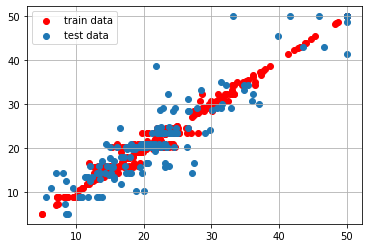

In [177]:
plt.scatter(y_train, y_pred_train, color = 'r', label = 'train data')
plt.scatter(y_test, y_pred_test, label = 'test data')
plt.grid()
plt.legend()
plt.show()

In [178]:
DT_regress.score(X_test, y_test)

0.8110131582743162

При параметре max_depth = 8 точность модели возрасла до 0.81 при использовании всех признаков. Визуализируем дерево.

In [179]:
from six import StringIO  
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus


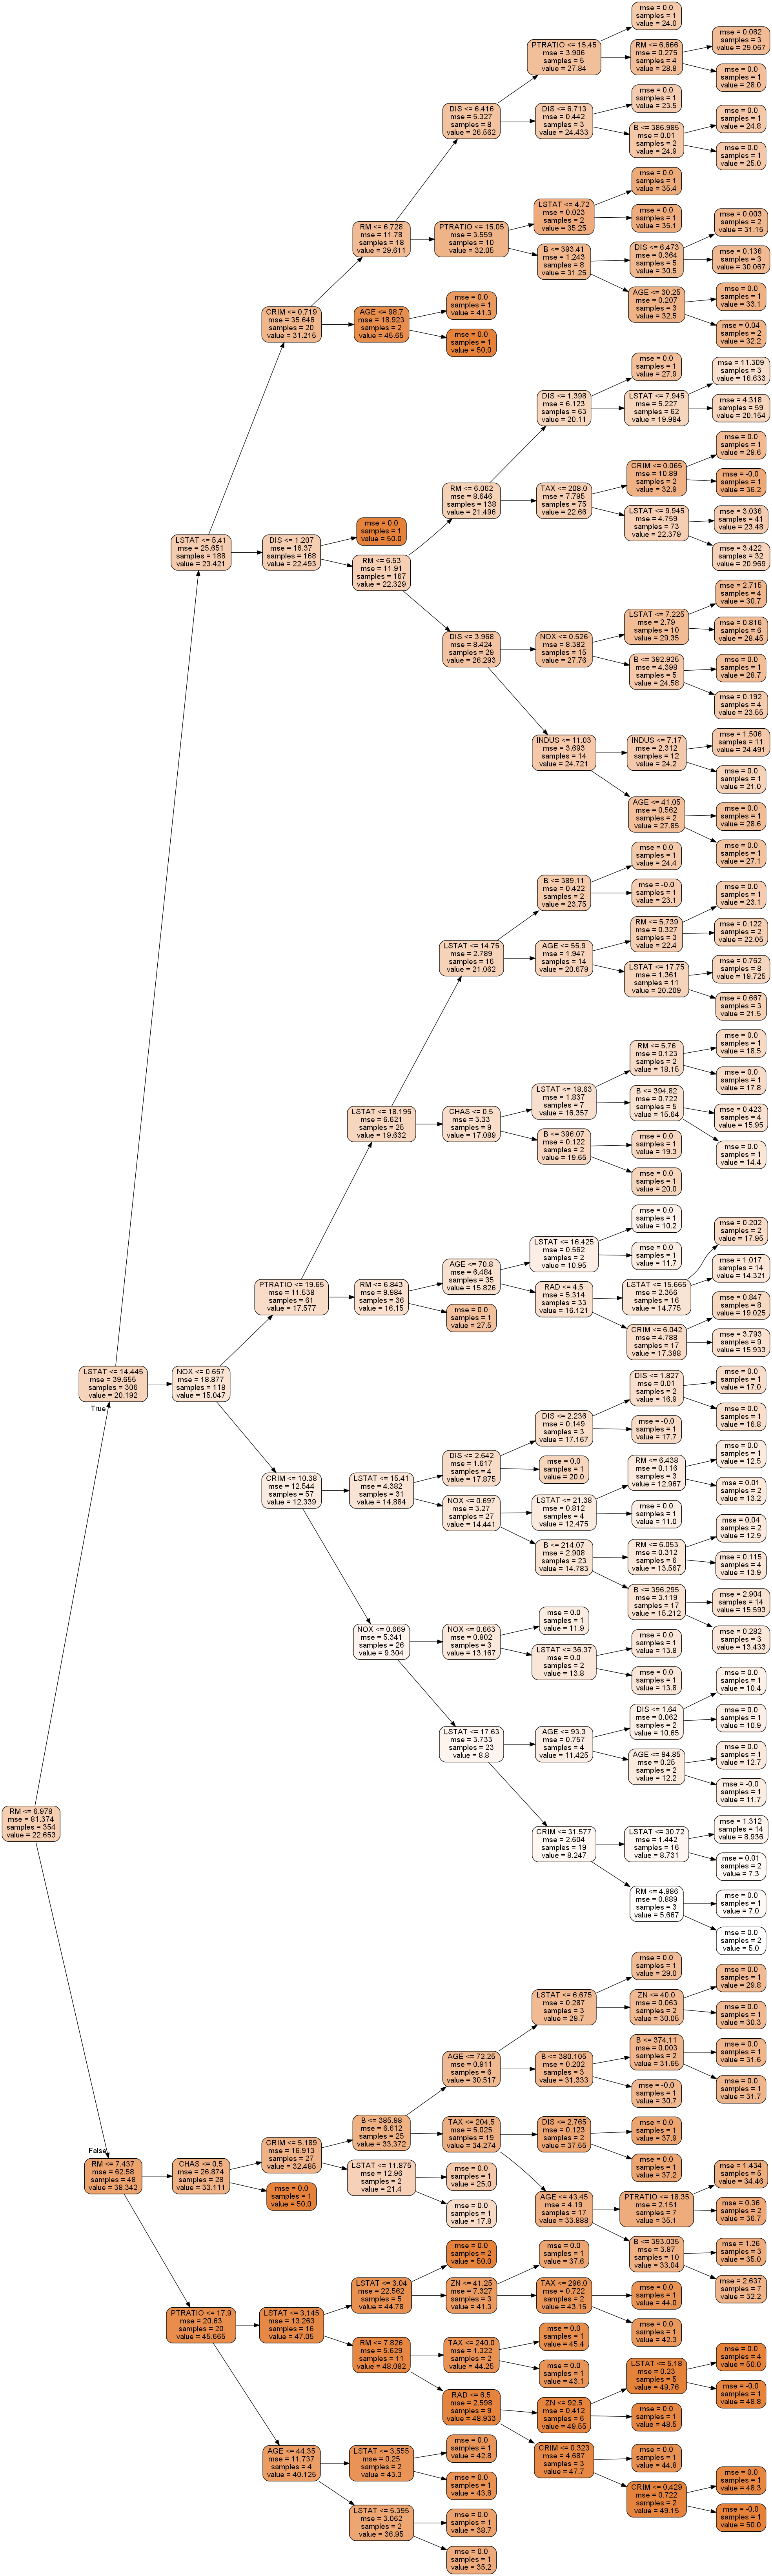

In [180]:
dot_data = StringIO()
export_graphviz(DT_regress, out_file = dot_data, feature_names = X_train.columns,\
                filled = True, rounded = True, rotate = True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Нагляднее визуализацию лучше показать при параметре max_depth = 2 или 3

DT_regress = DecisionTreeRegressor(max_depth = 3, random_state = 42)
DT_regress.fit(X_train, y_train)

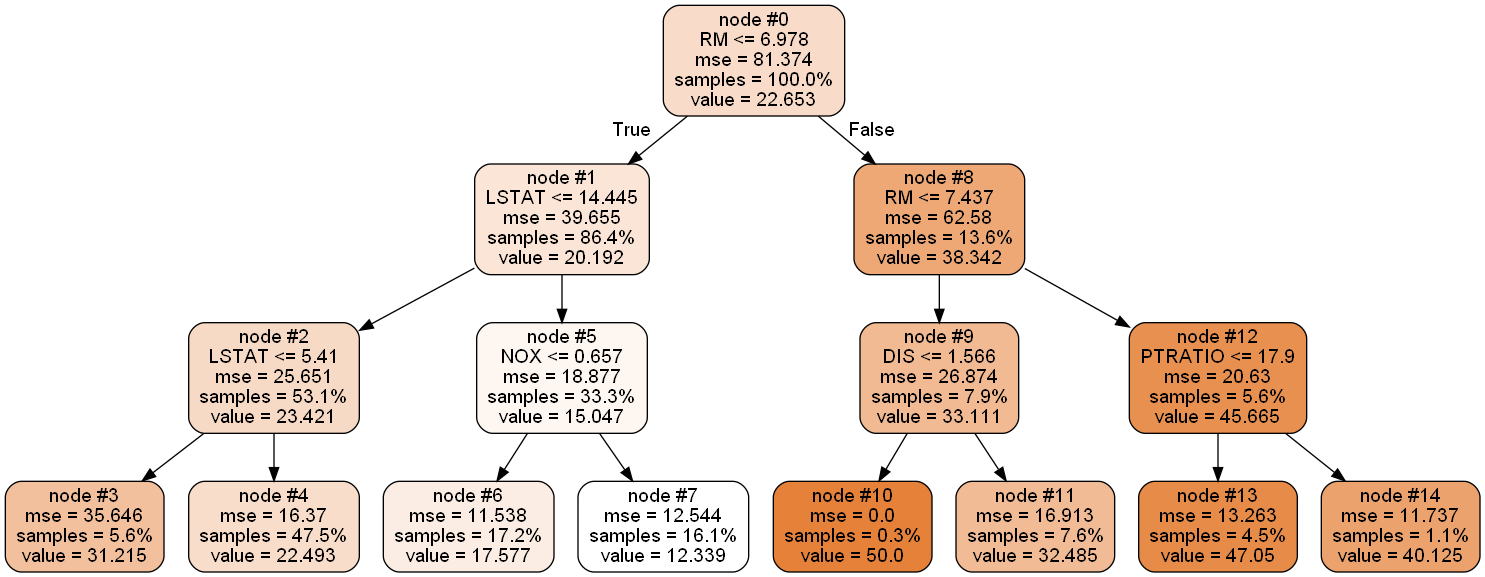

In [184]:
dot_data = StringIO()
export_graphviz(DT_regress, out_file = dot_data, feature_names = X_train.columns,\
                filled = True, rounded = True, node_ids = True, proportion = True, \
                rotate = False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

В предыдущем задании https://github.com/tmoseev/studying/blob/main/ML/boston_explor_analysis.ipynb было установлено, что параметры CHAS и RAD не сильно влияют на точность построенной модели линейной регресии, проверим эту гипотезу для decision tree

In [187]:
#новые признаки
X_hyp = data.drop(['CHAS', 'RAD', 'MEDV'], axis = 1)
y_hyp = data['MEDV']

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X_hyp, y_hyp, test_size=0.3, random_state = 11)

In [190]:
DT_regress = DecisionTreeRegressor(max_depth = 8, random_state = 42)

In [191]:
DT_regress.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8, random_state=42)

In [192]:
y_pred_train = DT_regress.predict(X_train) 
y_pred_test = DT_regress.predict(X_test)

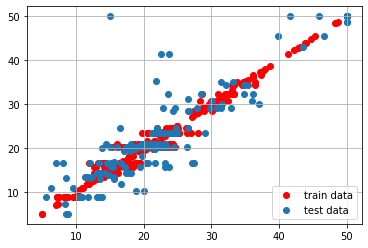

In [193]:
plt.scatter(y_train, y_pred_train, color = 'r', label = 'train data')
plt.scatter(y_test, y_pred_test, label = 'test data')
plt.grid()
plt.legend()
plt.show()

In [194]:
DT_regress.score(X_test, y_test)

0.7104563214022287

Гипотеза не подтвердилась, те признаки которые мешали при построении модели линейной регресии, в модели деревьев решений являются важными.